### ToDay Agenda (Image Preprocessor)
    1 - Propeties Of the Images
    2 - Image Smoothing and Bluring
    3 - Histogram 
    4 - Threashold Concept

In [16]:
# All Library Load w
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Which Shape is Hold (667, 500, 3)


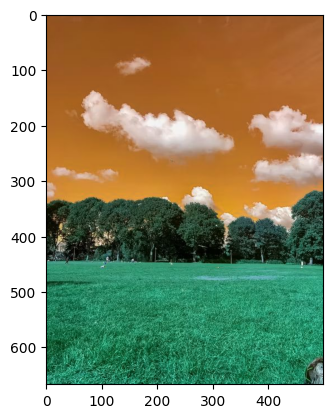

In [82]:
# Read the Image and see that the (in the form of the numpy)
img_read = cv2.imread("Images_Data/First_Day/ground.png")
print("Which Shape is Hold" , img_read.shape)
# plt.imshow(img_read)

# Firstly Extract the First Channel of the image
first_channel = img_read[: , : , 0]

# Extract the Second channel of the images
second_channel = img_read[: , : , 1]

# Extract the third channel of the image

third_channel = img_read[: , : , 2]


In [20]:

# Images data with the channel wise
def channel_extract(img):
    """
    This function is take the images and return the channel wise of 
    your image data
    """
    data = []

    for i in range(3):

        channel= img_read[: , : , i]
        data.append(channel)
    return data


    

In [81]:
# Image Path
path = "Images_Data/First_Day/ground.png"
img_data = channel_extract(path)


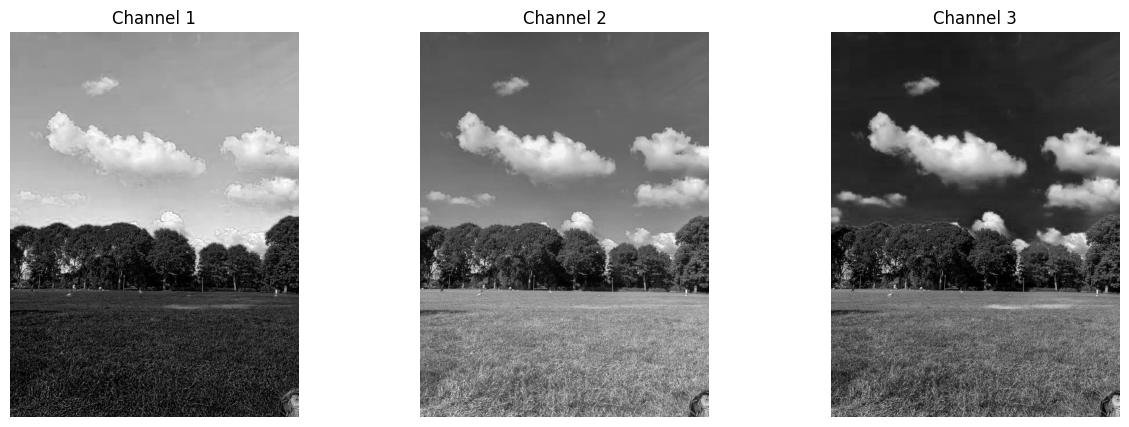

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(img_data[i], cmap='gray')  # Assuming channels are single-channel images
    axes[i].set_title(f'Channel {i+1}')
    axes[i].axis('off')  # Hide axes for a cleaner look

# Display the figure
plt.show()

In [115]:
# This Function is Combination of the Two Combination

def Two_Channel(img_array):
    """ 
    we are created the all combination of two channel of images
    like the (0,1) (0,2) (0,3) like that
    """
    combi_data = []
    for i in range(3):
        # curr = [img_array[i]]
        for j in range(i+1 ,3):
            new = img_array[j]
            # curr.append(new)
            # print(len(curr))
            # Concated the two channel
            first_channel = img_array[i]
            second_channel = img_array[j]
            # Combine 
            combined_channels = np.stack((first_channel , second_channel) , axis=-1)
            full = np.zeros((combined_channels.shape[0], combined_channels.shape[1], 3), dtype=np.uint8)
            full[: , : ,0] = first_channel
            full[: , : , 1] = second_channel
            print(full.shape)

            combi_data.append(full)
    # print(len(combi_data))
    return combi_data
    

In [116]:
data_ans = Two_Channel(img_data)
print("Data Shape of the particular images" , np.array(data_ans[0]).shape)

(667, 500, 3)
(667, 500, 3)
(667, 500, 3)
Data Shape of the particular images (667, 500, 3)


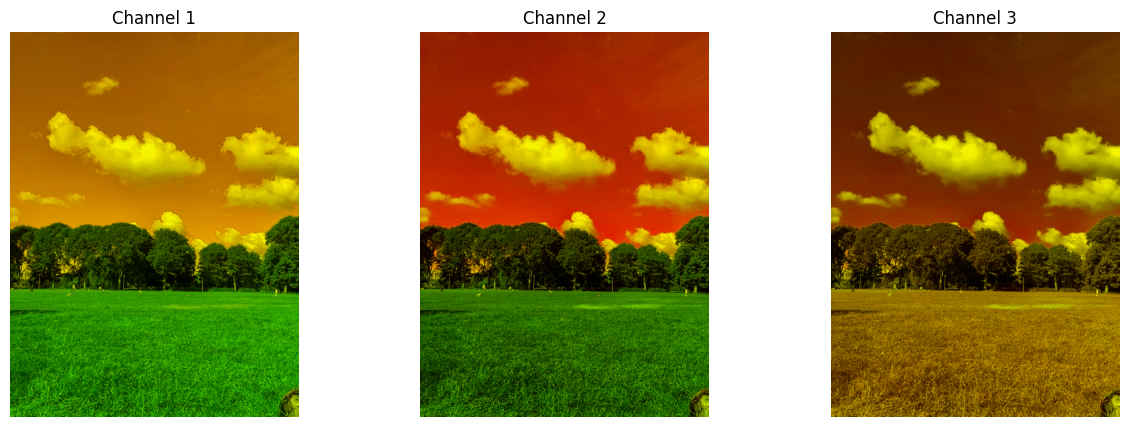

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(data_ans[i], cmap='gray')  # Assuming channels are single-channel images
    axes[i].set_title(f'Channel {i+1}')
    axes[i].axis('off')  # Hide axes for a cleaner look

# Display the figure
plt.show()

#### How TO split the Channel with and Merge the r ,g b


In [124]:
# Split the data
img_read = cv2.imread(path)
r , g , b = cv2.split(img_read)

# Merge the array
data = cv2.merge((r , g , b))
data.shape


(667, 500, 3)

### Image Smothing and Bluring
    - How to check the pixel intercity 
    - how i can the pixel qulality
    - edge detection mainly use concept 
    - improve your model accuracy 
#### Bulring
    - Low Instaly pixel values fill the values the high pixel value throw fill the values.
    - Use main Reduce the noise
    # Type 
    1 - mean
    2 - median
    3 - Gausian
    4 - Biltreal

### Mean Bluring
 -- [[1 ,2 , 3],
    [4 , 5 ,6],
    [7 , 8, 9]
    ]
##### Trow the keran we fill the data mean [5] values change the data mean data - 1+2+3+4+5+6+7+8+8//9 = values 
##### we  always mide values change and every time.


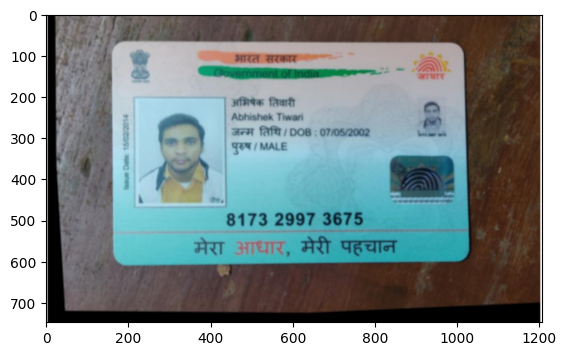

In [127]:
pan_path = cv2.imread('images/Pan_Card.png')
img = cv2.cvtColor(pan_path , cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [132]:
# Creating the Mean Filter Kernal 

def meankernal(size):
    mk = np.ones((size , size) , dtype= np.float32)/(size**2)
    # print(mk.shape)
    return mk
meankernal(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

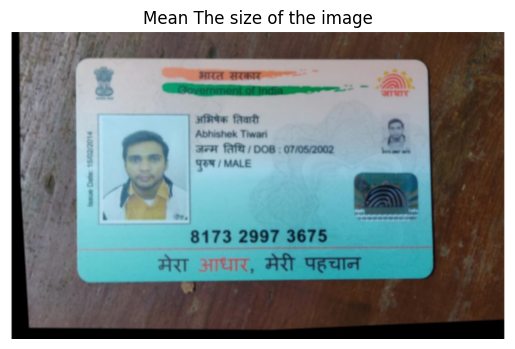

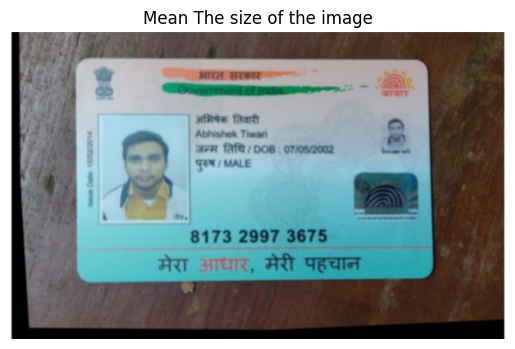

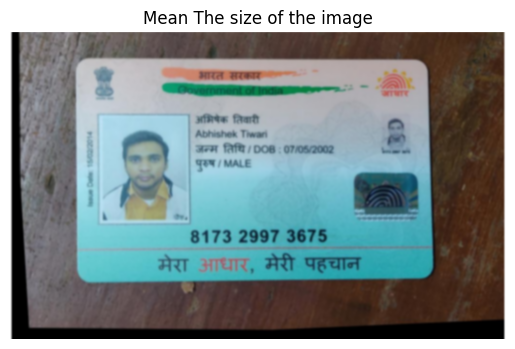

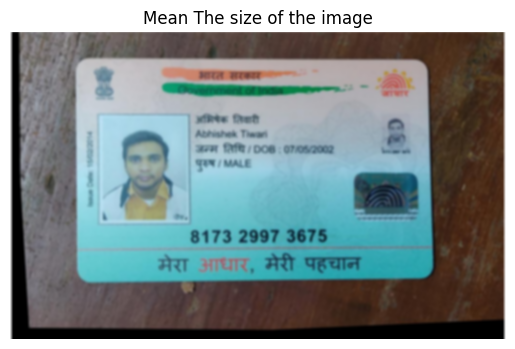

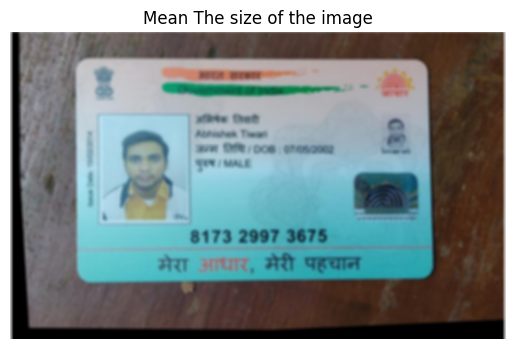

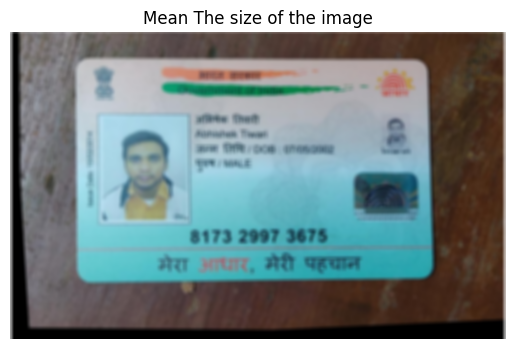

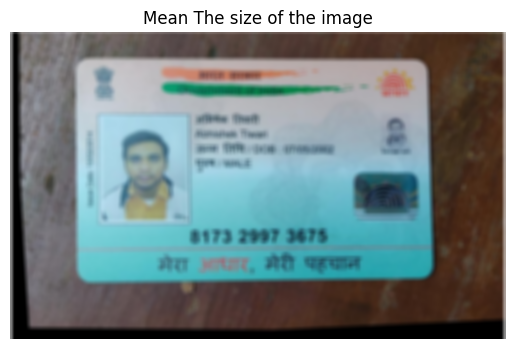

In [133]:
for size in range(1 , 14 , 2):
    blur_img = cv2.filter2D(img , -1 , meankernal(size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title("Mean The size of the image")
    plt.axis("off")
    plt.show()

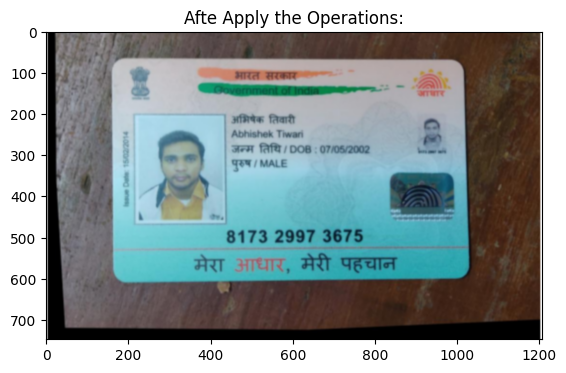

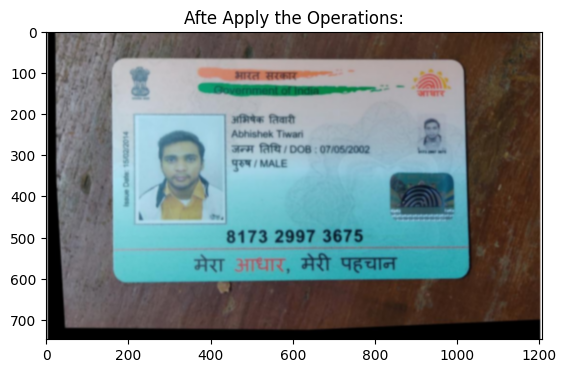

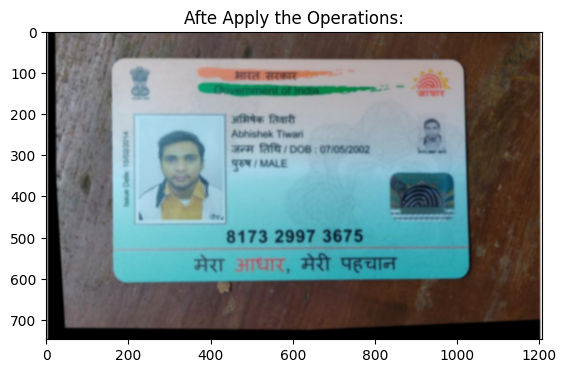

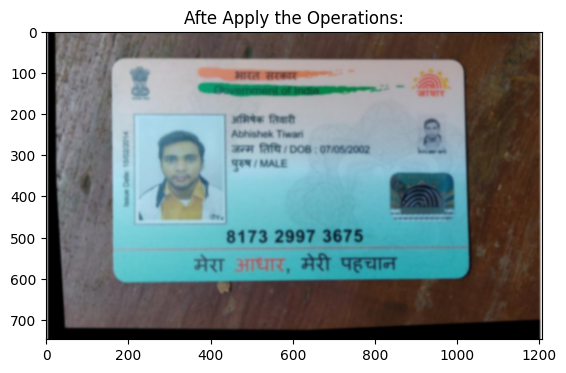

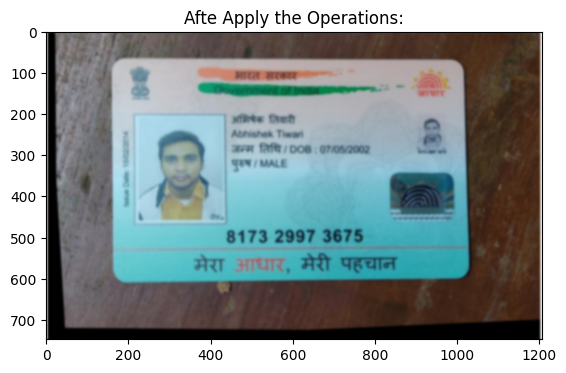

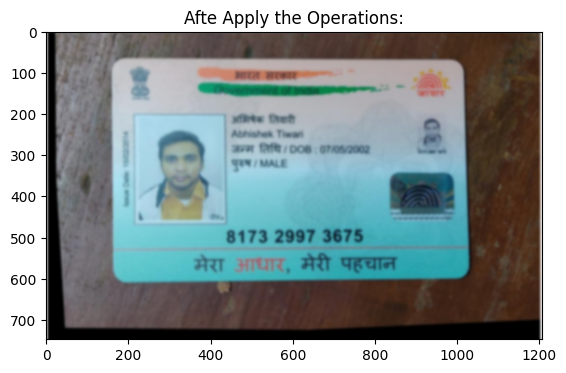

In [134]:
for size in range(3 , 14 , 2):
    blur_img = cv2.GaussianBlur(img , (size , size) , 0)
    plt.figure()
    plt.imshow(blur_img)
    plt.title("Afte Apply the Operations:")
    plt.show()

#### Image Histogram Check
 - how much pixel value are increase
 - By Deafult cv2 read the image in the form of the BGR but we always neeed to the RGB
 - with help of histogram we are see hom much frequency will we on the one pixel value(pixel by frequncey check)
 

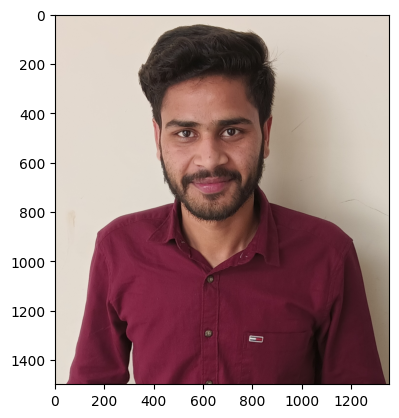

In [141]:
# BGR 
sachin_image = "Images_Data/First_Day/sachin kumar.jpg"
img = cv2.imread(sachin_image)
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [146]:
# Image size and shape
print(img.shape , img.size)

# First Step You Image is 3D but we need the One D image
print(img.ravel().shape)

(1499, 1357, 3) 6102429
(6102429,)


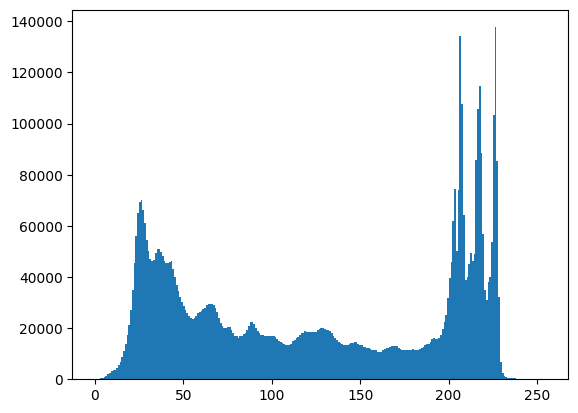

In [150]:
plt.hist(img.ravel() , bins = 256 , range=[0 , 255])
plt.show()

# Darkel pixel show the like my hair black pixel value is low 

### Thresholad Values 
 - we can use the threashold values to fi

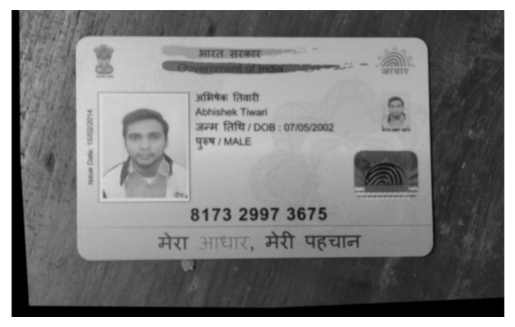

In [160]:
path = "images/Pan_Card.png"
img = cv2.imread(path)
# Convet the image into the gray scale
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap='gray')
plt.axis("off")
plt.show()

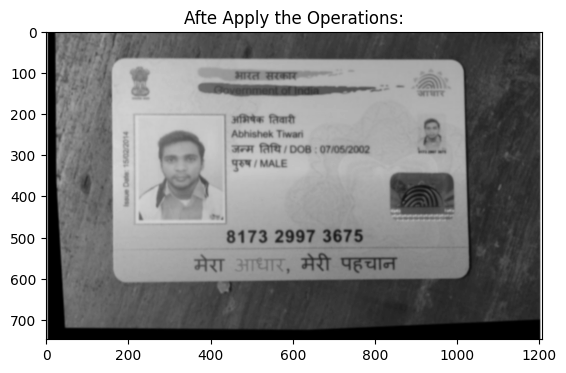

In [162]:
blur_img = cv2.GaussianBlur(gray , (3 , 3) , 0)
plt.figure()
plt.imshow(blur_img , cmap='gray')
plt.title("Afte Apply the Operations:")
plt.show()

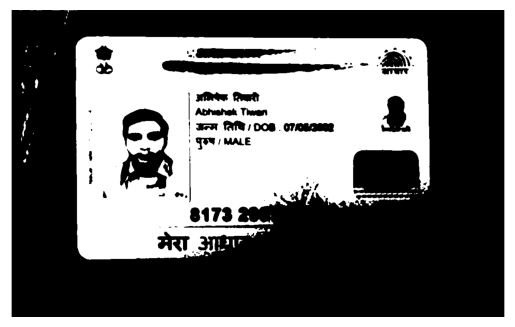

In [163]:
# Now We are remove the background of the images with the help of hte This

T , thresh = cv2.threshold(blur_img , 150 , 255 , cv2.THRESH_BINARY)
plt.imshow(thresh , cmap='gray')
plt.axis("Off")
plt.show()

150.0


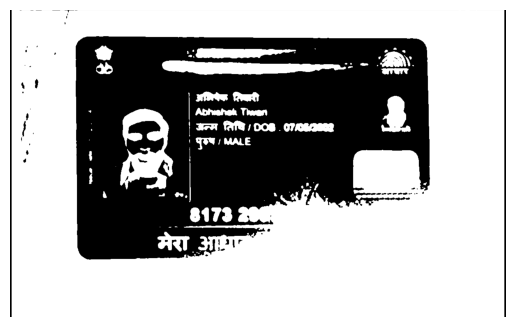

In [166]:
# Now We are remove the background of the images with the help of hte This
T , thresh = cv2.threshold(blur_img , 150 , 255 , cv2.THRESH_BINARY_INV)
print(T)
plt.imshow(thresh , cmap='gray')
plt.axis("Off")
plt.show()

110.0


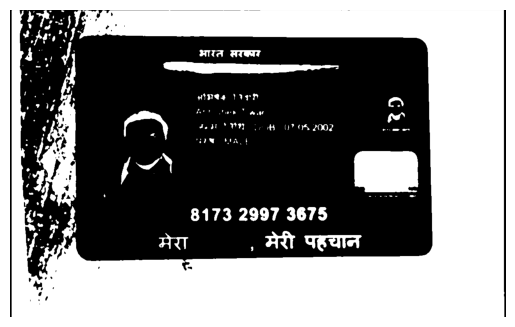

In [168]:
# Now We are remove the background of the images with the help of hte This
T , thresh = cv2.threshold(blur_img , 150 , 255 , cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(T)
plt.imshow(thresh , cmap='gray')
plt.axis("Off")
plt.show()